<font size="5">Import Libraries</font>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
import os

import matplotlib.pyplot as plt
plt.style.use("ggplot")

import seaborn as sb
sb.set(rc = {'figure.figsize':(12,7)})

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
oversampler = SMOTE(random_state=1)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold as skf
skfold = skf(n_splits = 4, shuffle = True, random_state = 70)
from sklearn.model_selection import cross_val_score

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

<font size="5">Read CSV and load data</font>

In [15]:
star = pd.read_csv('stellar_classification.csv')

<font size="5">Exploratory data analysis</font>

In [16]:
star.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [17]:
star.tail()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470
99999,1.237661e+18,196.896053,49.464643,22.62171,21.79745,20.60115,20.00959,19.28075,3650,301,4,60,8.343152e+18,GALAXY,0.542944,7410,57104,851


In [18]:
#A rough overview of data
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [19]:
#Checking if any values are null......
star.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [20]:
a, b, c = star["class"].value_counts() / len(star)
print(f"Total percentage of Galaxies : {round(a*100, 1)}%")
print(f"Total percentage of Stars : {round(b*100, 1)}%")
print(f"Total percentage of QSO : {round(c*100, 1)}%")

Total percentage of Galaxies : 59.4%
Total percentage of Stars : 21.6%
Total percentage of QSO : 19.0%


<Axes: xlabel='class', ylabel='count'>

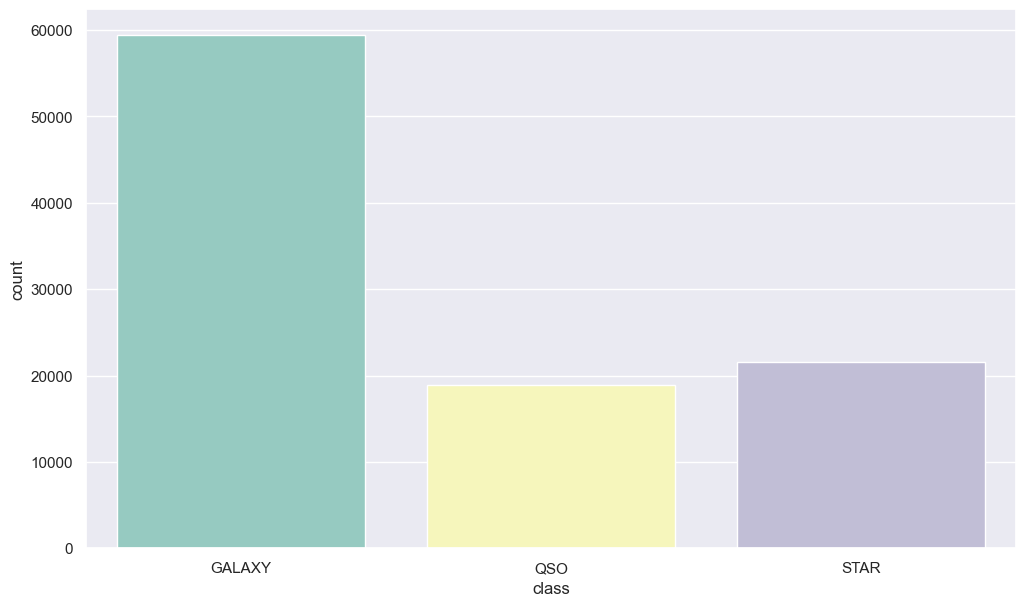

In [21]:
sb.countplot(x = star["class"], palette="Set3")

In [22]:
star.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


<font size="5">Visualisation of data</font>

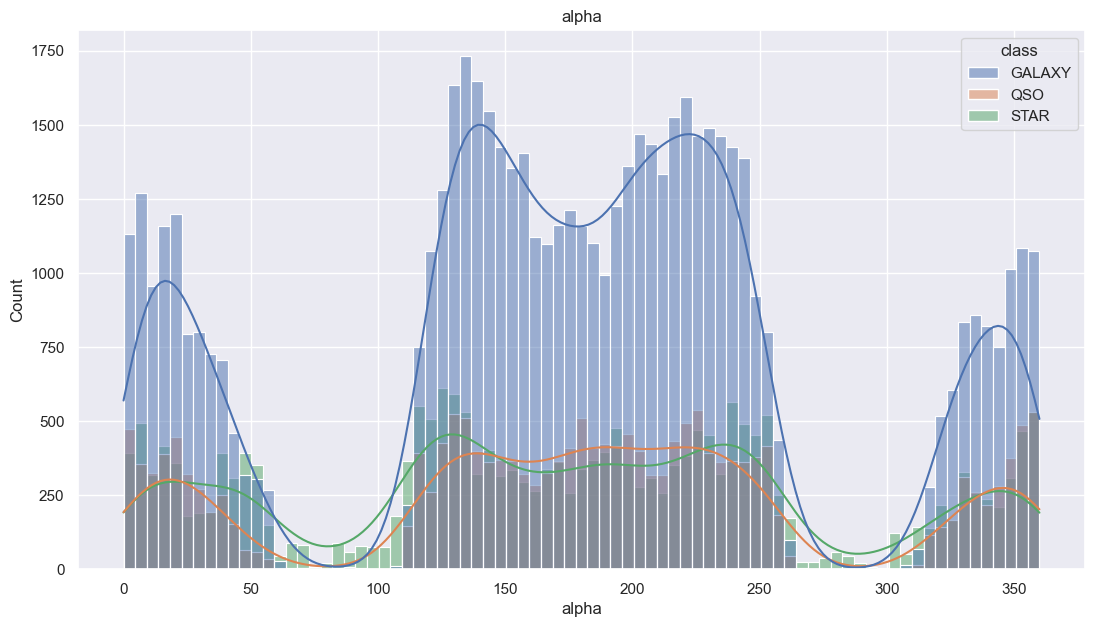

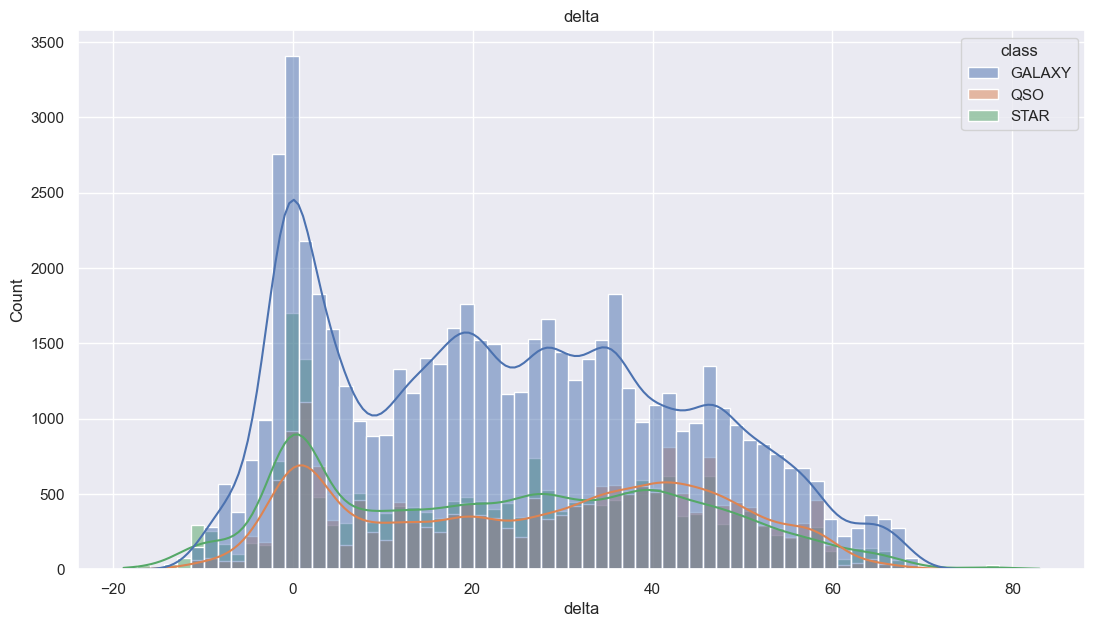

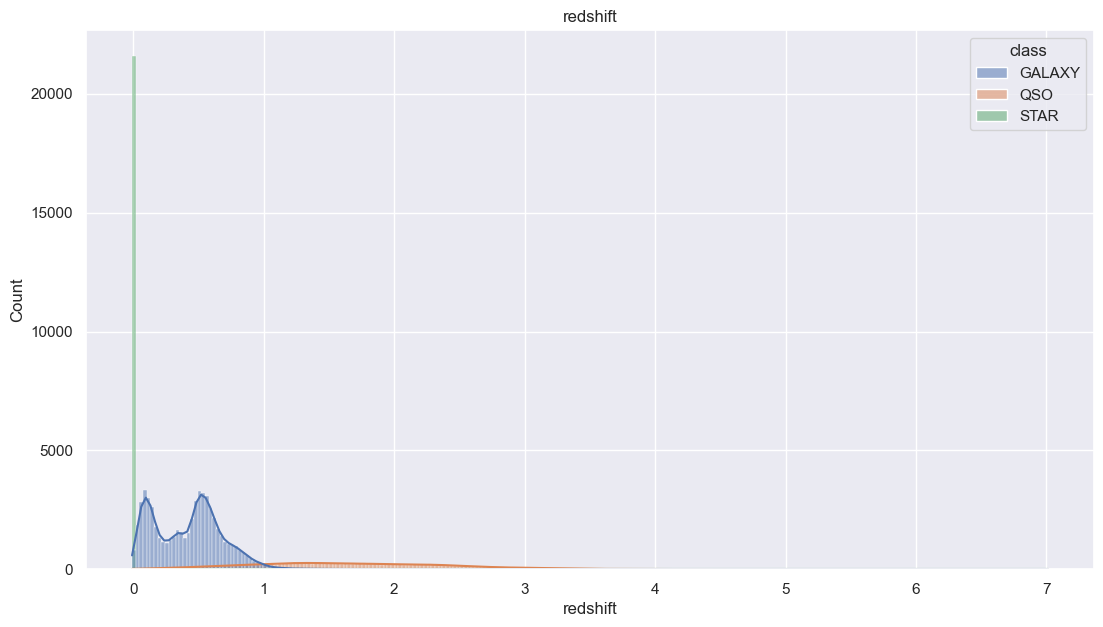

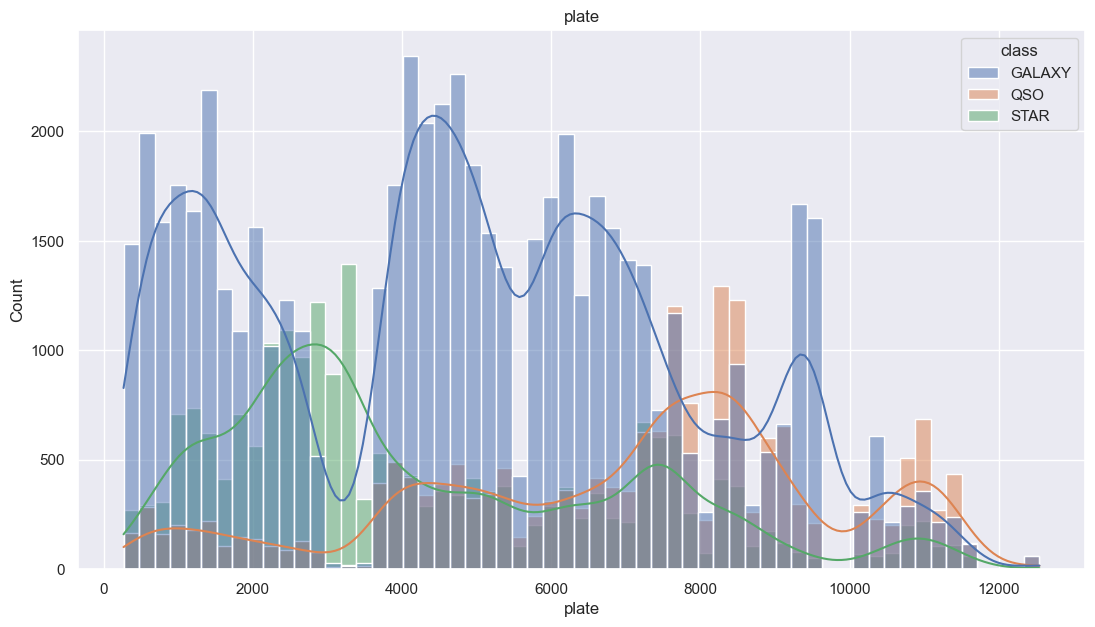

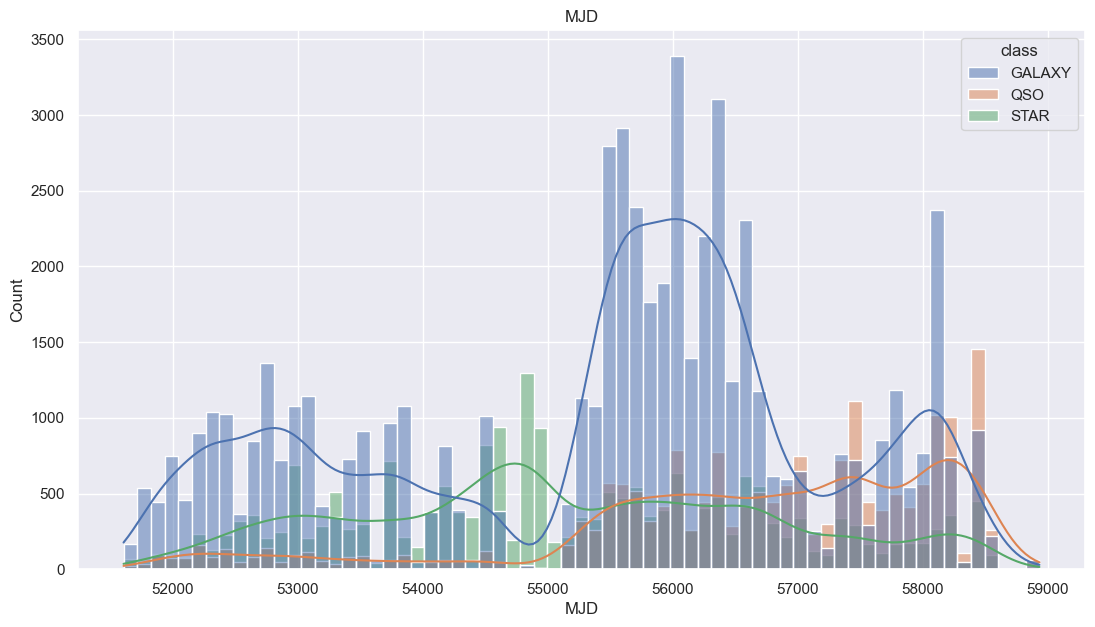

In [23]:
#We can train our models faster if we choose those features which can distinguish well between our classes.....
#As alpha, delta, u, g, r, i, z, redshift, plate, MJD are astronomical quantities, therefore, we'll keep them as our primary feature...

for i in ['alpha', 'delta','redshift', 'plate', 'MJD']:
    plt.figure(figsize=(13,7))
    sb.histplot(data=star, x=i, kde=True, hue="class")
    plt.title(i)
    plt.show()

In [24]:
# Now i'll use KDE to visualise the photometric filters which are u, g, r, i, z

le = LabelEncoder()
star["class"] = le.fit_transform(star["class"])
star["class"] = star["class"].astype(int)

def plot(column):
    for i in range(3):
        sb.kdeplot(data=star[star["class"] == i][column], label = le.inverse_transform([i]), fill = True)
    sb.kdeplot(data=star[column],label = ["All"], fill = True)
    plt.legend()
    
def log_plot(column):
    for i in range(3):
        sb.kdeplot(data=np.log(star[star["class"] == i][column]), label = le.inverse_transform([i]), fill = True)
    sb.kdeplot(data=np.log(star[column]),label = ["All"], fill = True)
    plt.legend();    

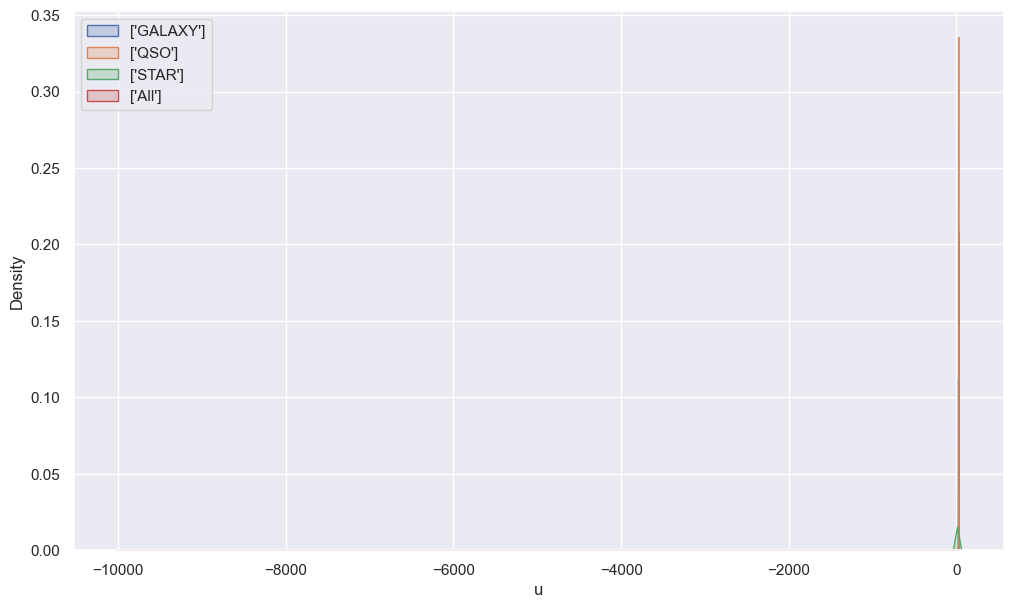

In [25]:
plot('u')

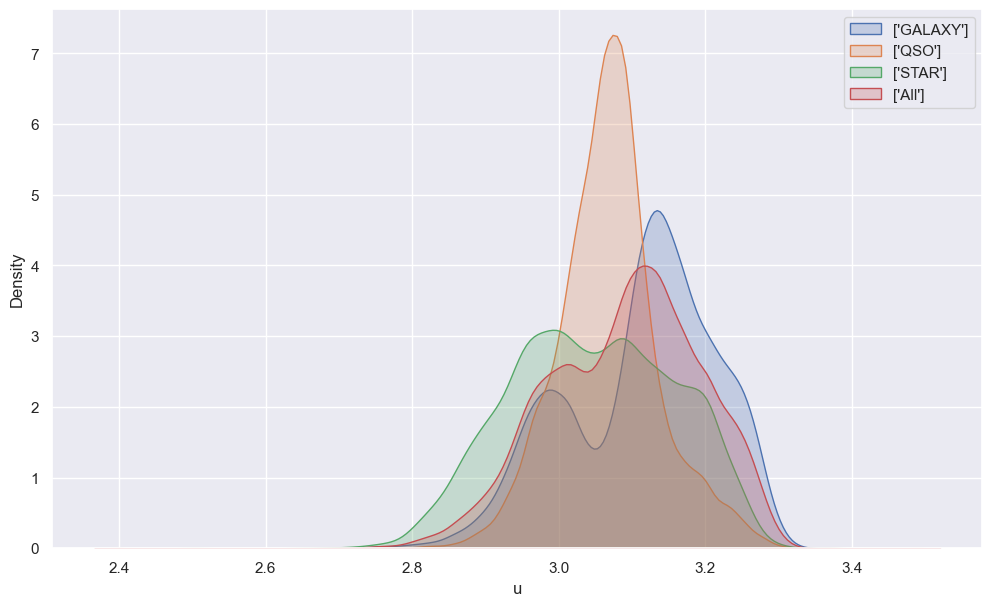

In [26]:
#I'll apply log due to extreme values
log_plot('u')

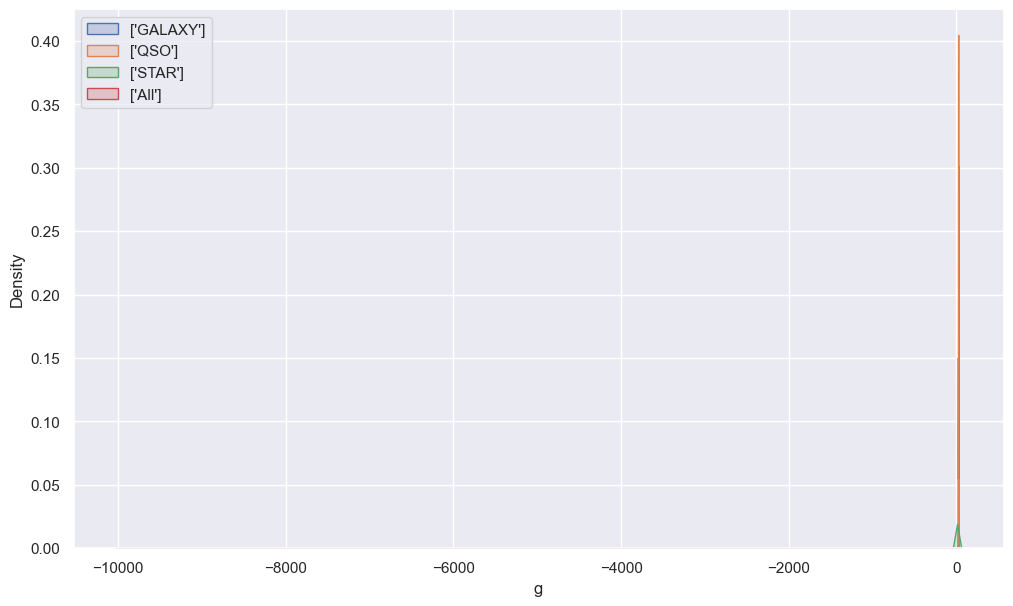

In [27]:
plot('g')

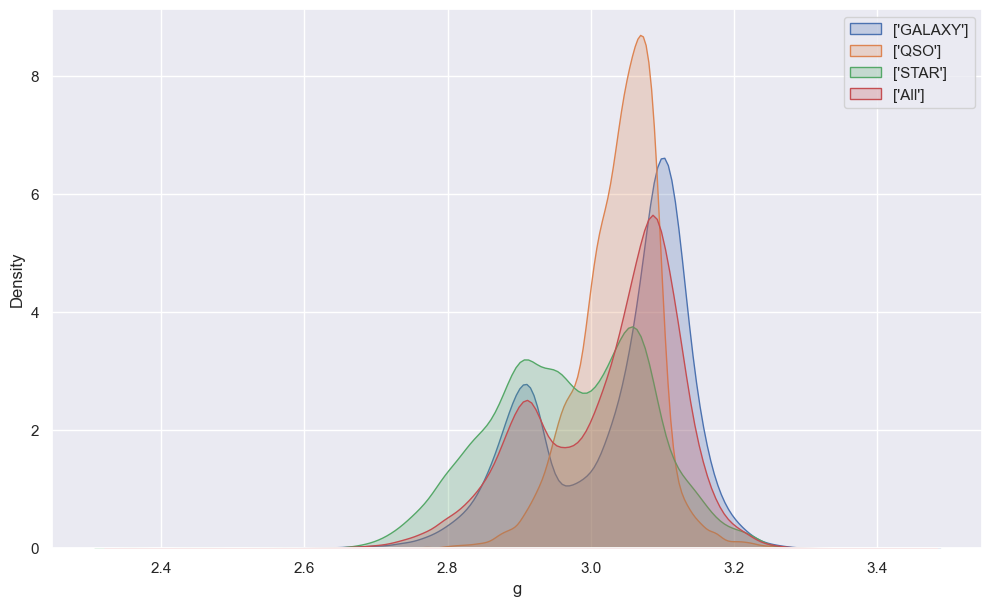

In [28]:
#I'll apply log due to extreme values
log_plot('g')

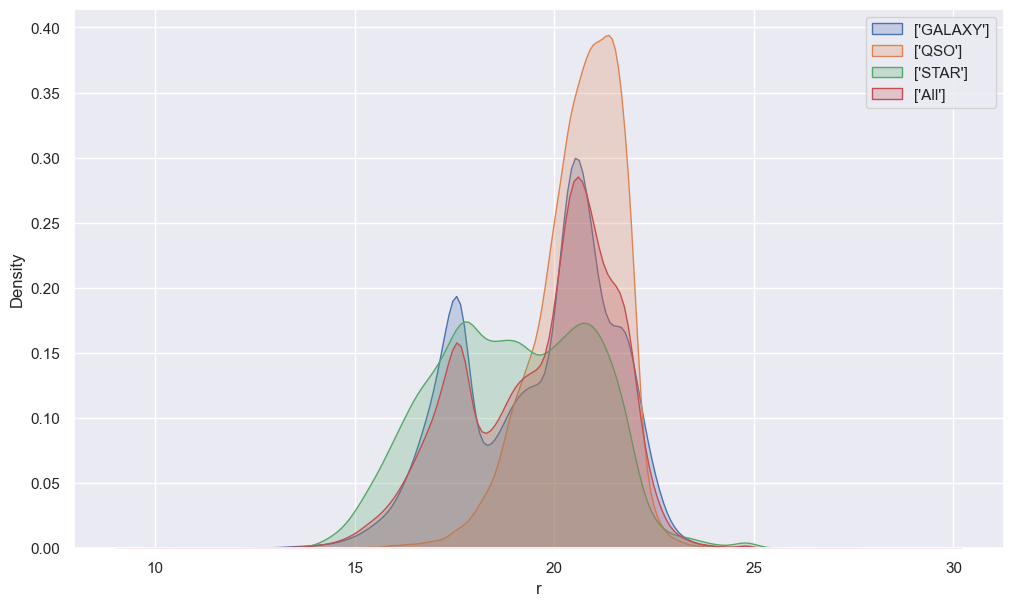

In [29]:
plot('r')

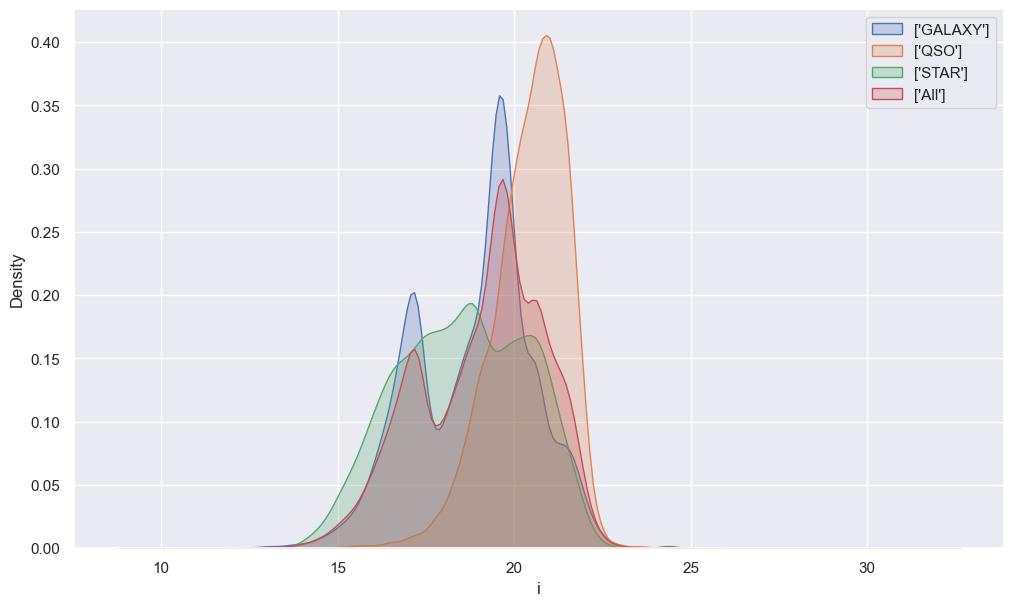

In [30]:
plot('i')

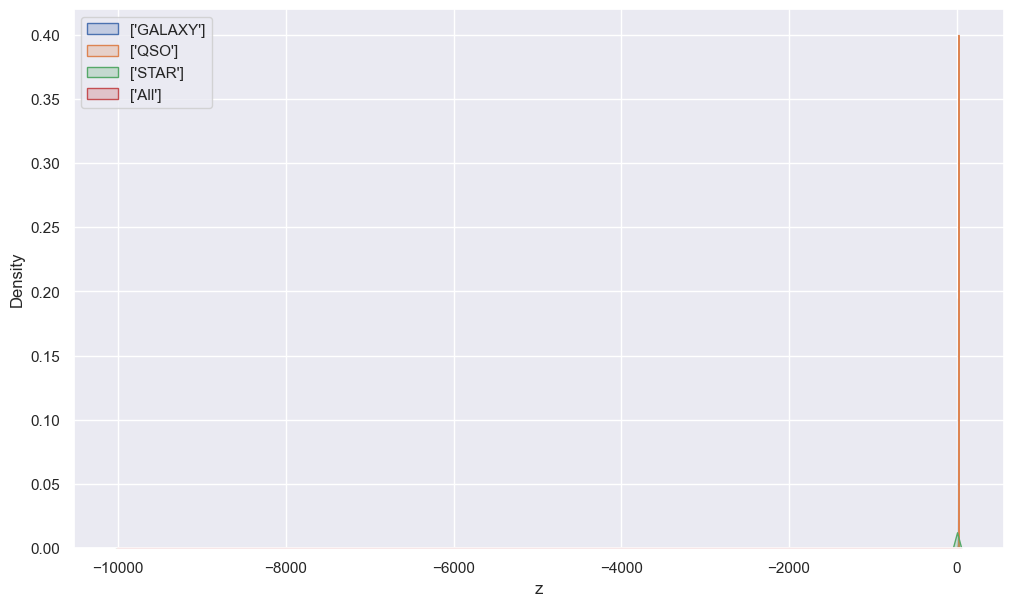

In [31]:
plot('z')

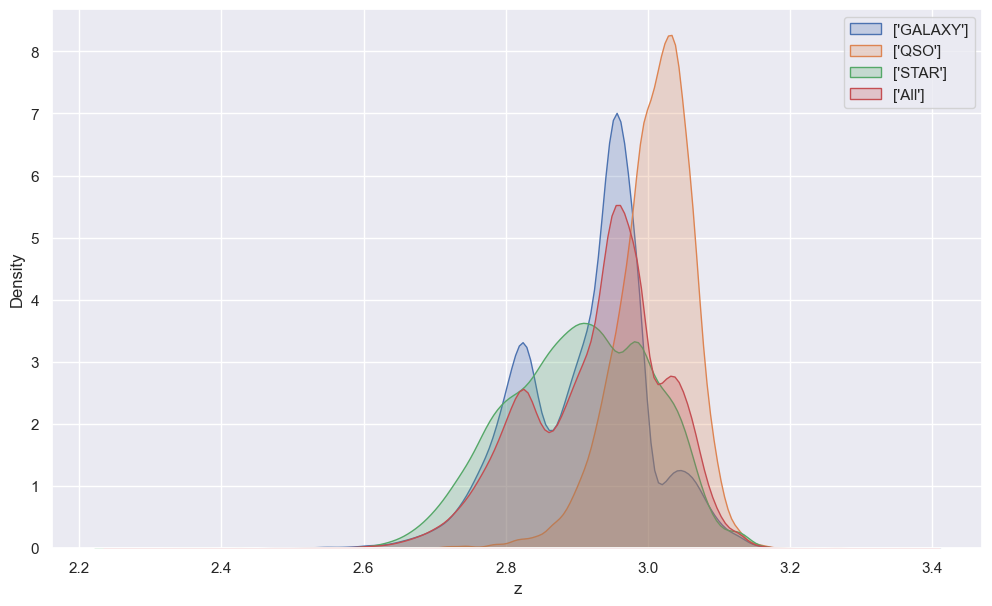

In [32]:
#I'll apply log due to extreme values
log_plot('z')

<font size="5">Data Preprocessing</font>

<font size="4">Cleaning of data</font>

In [33]:
#Sometimes due to outliers, we can't do good analysis of our data therefore, we decided to remove them as our current dataset contains aloooooooooooot of outliers

def rem_outliers():
    s1 = star.shape

    for i in star.select_dtypes(include = 'number').columns:
        qt1 = star[i].quantile(0.25)
        qt3 = star[i].quantile(0.75)
        iqr =  qt3 - qt1
        lower = qt1-(1.5*iqr)
        upper = qt3+(1.5*iqr)
        min_in = star[star[i]<lower].index
        max_in = star[star[i]>upper].index
        star.drop(min_in, inplace = True)
        star.drop(max_in, inplace = True)
    
    s2 = star.shape
    outliers = s1[0] - s2[0]
    return outliers

In [34]:
print("Number of outliers deleted are : ", rem_outliers())

Number of outliers deleted are :  14266


<font size="4">Data Modeling</font>

In [35]:
#First of all we'll make a copy to for further training and testing purpose
star = star.copy() 

# I'ill drop the rest like run_id, rerun_id, field_id as they don't  make any significant difference in distribution by class
star.drop(['run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','fiber_ID','obj_ID'],axis=1, inplace = True)

#Our target column is class therefore, we'll do test on it after training on the rest of columns
X = star.drop('class',axis=1)
y = star['class']    

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle=True, random_state=43)
    
#Making a standardize dataset
sc = StandardScaler()
sc.fit(X_train)
    
X_train = pd.DataFrame(sc.transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = X_test.index)

#Training the dataset
X_train_smote, y_train_smote = oversampler.fit_resample(X_train, y_train)

models = {
    '        Linear Support Vector Machine : ': LinearSVC(),
    '        Decision Tree : ': DecisionTreeClassifier(),
    '        Random Forest Classifier : ': RandomForestClassifier(),
}

for model_name, model in models.items():
    model = model.fit(X_train_smote, y_train_smote)
    print(model_name + " Trained")

        Linear Support Vector Machine :  Trained
        Decision Tree :  Trained
        Random Forest Classifier :  Trained


<font size="4">Validation of Models</font>

In [36]:
#Checking the validy of SVM, DecisionTree and random forest classifier model.....

for model_name, model in models.items():
    print(model_name + " {:.2f}%".format(model.score(X_test, y_test) * 100))

        Linear Support Vector Machine :  90.61%
        Decision Tree :  95.16%
        Random Forest Classifier :  97.41%


In [37]:
#Validating CatBoostClassifier model here using cross validation.....

model = CatBoostClassifier(verbose  = 0)
score = cross_val_score(model, X, y, cv = skfold)
print('CatBoostClassifier : ' + " {:.2f}%".format(np.mean(score) * 100))

CatBoostClassifier :  97.56%
